<a href="https://colab.research.google.com/github/chenzhivis/nyc-mhtn-ds-051120-lectures/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Import Libraries and Connect to Drive

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [3]:
ls

adc.json  sample_data/


## Load Training Data

In [4]:
# make directory to hold all our date
!mkdir data

In [9]:
ls

adc.json  data/  sample_data/


In [13]:
cd data

/content/data


In [14]:
# google drive folder id holding our zip files
folder_id='1hyFG7HStEvNnM3SbSL8yEAoG4N5PnyT3'

#list of files in folder
file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % folder_id}).GetList()

In [15]:
#download files
for file in file_list:
  try:
    downloaded = drive.CreateFile({'id': file['id']})
    downloaded.GetContentFile(downloaded['title'])
  except:
    pass

In [16]:
#unzip hot dog and not hot dog folders 
!unzip hot_dog.zip
!unzip not_hot_dog.zip

Archive:  hot_dog.zip
   creating: hot_dog/
  inflating: hot_dog/11-a.jpg        
  inflating: hot_dog/841980.jpg      
  inflating: hot_dog/54-a.jpg        
  inflating: hot_dog/646412.jpg      
  inflating: hot_dog/1182-a.jpg      
  inflating: hot_dog/900-a.jpg       
  inflating: hot_dog/143-a.jpg       
  inflating: hot_dog/592-a.jpg       
  inflating: hot_dog/180961.jpg      
  inflating: hot_dog/264487.jpg      
  inflating: hot_dog/3622018.jpg     
  inflating: hot_dog/3503720.jpg     
  inflating: hot_dog/3497633.jpg     
  inflating: hot_dog/207-a.jpg       
  inflating: hot_dog/1062-a.jpg      
  inflating: hot_dog/1027-a.jpg      
  inflating: hot_dog/472-a.jpg       
  inflating: hot_dog/701201.jpg      
  inflating: hot_dog/408504.jpg      
  inflating: hot_dog/773-a.jpg       
  inflating: hot_dog/291354.jpg      
  inflating: hot_dog/910098.jpg      
  inflating: hot_dog/853994.jpg      
  inflating: hot_dog/1186993.jpg     
  inflating: hot_dog/865-a.jpg       
  infl

In [17]:
#remove zip files
!rm hot_dog.zip
!rm not_hot_dog.zip

In [18]:
cd hot_dog

/content/data/hot_dog


In [20]:
# remove extra folder in hot_dog folder
rmdir hot_dog

In [23]:
# navigate back to /content
cd .. 

/content/data


In [25]:
#optional testing images
cd testing

[Errno 2] No such file or directory: 'testing'
/content/data


In [26]:
!ls

hot_dog  not_hot_dog


In [27]:
#load testing examples
folder_id='1QePXVok8Y-Vr_jYyJq6Myzm5xpYjRlrg'
file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % folder_id}).GetList()

for file in file_list:
  downloaded = drive.CreateFile({'id': file['id']})
  downloaded.GetContentFile(downloaded['title'])

In [29]:
#make sure you are in the content directory
cd ..

/content


## Preprocess Images

In [ ]:
directory = 'data/'

In [ ]:
# get all the data in the directory split/test, and reshape them
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory, 
        target_size=(224, 224), 
        batch_size = 4419, 
        seed = 123) 

Found 4420 images belonging to 2 classes.


In [ ]:
#split images and labels
images, labels = next(data_all)

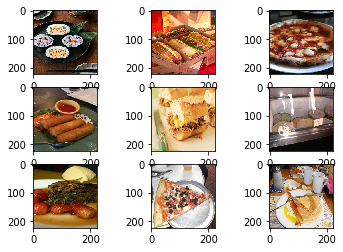

In [ ]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(images[i])
plt.show()

In [ ]:
#reshape labels

labels = np.reshape(labels[:,0], (4419,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

## 3. Convolutional neural network

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=50,
                    validation_data=(X_val, y_val))




Train on 2828 samples, validate on 707 samples
Epoch 1/10





2828/2828 [==============================] - 19s 7ms/step - loss: 0.6021 - acc: 0.7072 - val_loss: 0.5980 - val_acc: 0.7044
Epoch 2/10
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5876 - acc: 0.7139 - val_loss: 0.5878 - val_acc: 0.7044
Epoch 3/10
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5770 - acc: 0.7139 - val_loss: 0.6147 - val_acc: 0.7044
Epoch 4/10
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5754 - acc: 0.7139 - val_loss: 0.5789 - val_acc: 0.7044
Epoch 5/10
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5665 - acc: 0.7139 - val_loss: 0.5843 - val_acc: 0.7044
Epoch 6/10
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5596 - acc: 0.7139 - val_loss: 0.5700 - val_acc: 0.7044
Epoch 7/10
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5496 - acc: 0.7139 - val_loss: 0.5967 - val_acc: 0.7044
Epoch 

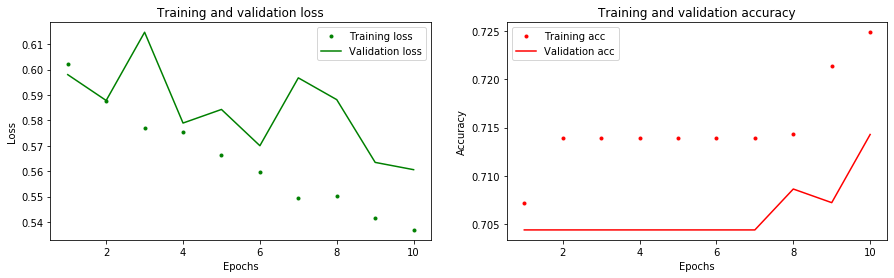

In [ ]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

884/884 [==============================] - 1s 691us/step
[0.5220946661147909, 0.7234794908905299] [0.5929475531858557, 0.6798642536633694]


## Transfer Learning

### InceptionNet

In [ ]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [ ]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
new_model = models.Sequential()
new_model.add(imagenet)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dense(1024,activation='relu')) #dense layer 2
new_model.add(Dense(512,activation='relu')) #dense layer 3
new_model.add(Dense(1,activation='sigmoid')) #final layer with softmax activation




87916544/87910968 [==============================] - 3s 0us/step


In [ ]:
for i,layer in enumerate(imagenet.layers):
  print(i,layer.name, layer.trainable)

0 input_1 False
1 conv2d_3 True
2 batch_normalization_1 True
3 activation_1 True
4 conv2d_4 True
5 batch_normalization_2 True
6 activation_2 True
7 conv2d_5 True
8 batch_normalization_3 True
9 activation_3 True
10 max_pooling2d_3 True
11 conv2d_6 True
12 batch_normalization_4 True
13 activation_4 True
14 conv2d_7 True
15 batch_normalization_5 True
16 activation_5 True
17 max_pooling2d_4 True
18 conv2d_11 True
19 batch_normalization_9 True
20 activation_9 True
21 conv2d_9 True
22 conv2d_12 True
23 batch_normalization_7 True
24 batch_normalization_10 True
25 activation_7 True
26 activation_10 True
27 average_pooling2d_1 True
28 conv2d_8 True
29 conv2d_10 True
30 conv2d_13 True
31 conv2d_14 True
32 batch_normalization_6 True
33 batch_normalization_8 True
34 batch_normalization_11 True
35 batch_normalization_12 True
36 activation_6 True
37 activation_8 True
38 activation_11 True
39 activation_12 True
40 mixed0 True
41 conv2d_18 True
42 batch_normalization_16 True
43 activation_16 True
44 c

In [ ]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 True
1 global_average_pooling2d_1 True
2 dense_3 True
3 dense_4 True
4 dense_5 True
5 dense_6 True


In [ ]:
for layer in new_model.layers[:1]:
    layer.trainable=False

In [ ]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 inception_v3 False
1 global_average_pooling2d_1 True
2 dense_3 True
3 dense_4 True
4 dense_5 True
5 dense_6 True


In [ ]:
new_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
new_model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=50,
          validation_data=(X_val, y_val))

Train on 2828 samples, validate on 707 samples
Epoch 1/10
2828/2828 [==============================] - 12s 4ms/step - loss: 0.5139 - acc: 0.7864 - val_loss: 0.5317 - val_acc: 0.7836
Epoch 2/10
2828/2828 [==============================] - 6s 2ms/step - loss: 0.3178 - acc: 0.8678 - val_loss: 0.3553 - val_acc: 0.8769
Epoch 3/10
2828/2828 [==============================] - 6s 2ms/step - loss: 0.2949 - acc: 0.8769 - val_loss: 0.8696 - val_acc: 0.7214
Epoch 4/10
2828/2828 [==============================] - 6s 2ms/step - loss: 0.2649 - acc: 0.8879 - val_loss: 1.0394 - val_acc: 0.7115
Epoch 5/10
2828/2828 [==============================] - 6s 2ms/step - loss: 0.2785 - acc: 0.8819 - val_loss: 0.3300 - val_acc: 0.8854
Epoch 6/10
2828/2828 [==============================] - 6s 2ms/step - loss: 0.2410 - acc: 0.8985 - val_loss: 1.2694 - val_acc: 0.6690
Epoch 7/10
2828/2828 [==============================] - 6s 2ms/step - loss: 0.2211 - acc: 0.9045 - val_loss: 0.8219 - val_acc: 0.8204
Epoch 8/10
282

In [ ]:
new_model.evaluate(X_test, y_test)

884/884 [==============================] - 2s 3ms/step


[1.0715220459985517, 0.7601809952054088]

In [ ]:
predictions_transfer = new_model.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

In [ ]:
f1_score(y_test, predictions_transfer)

0.7260981912144703

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[391 205]
 [  7 281]]


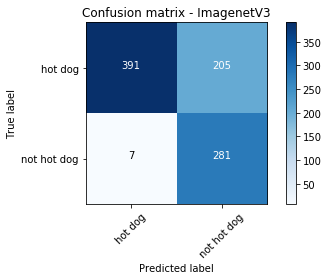

In [ ]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions_transfer), classes=['hot dog', 'not hot dog'], normalize=False,
                      title='Confusion matrix - ImagenetV3')

In [ ]:
def predictoneimage_cnn(model, path):
    img = load_img(path, target_size=(224, 224))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    return predict

In [ ]:
!ls

adc.json  data	sample_data


array([[1.]], dtype=float32)

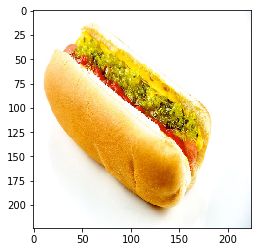

In [ ]:
predictoneimage_cnn(new_model, 'data/hotdog1.jpg')